## Plotting composites ##

Plotting composites for two types of very bad winter days across three datasets: ERA5, DePreSys (10 members, Nov. init, first DJF), and CANARI (40 members, DJF).

1. Worst wind cold temp events - for each winter, this is where I've selected the day with the lowest wind speed and taken the corresponding temperature on that 'worst wind' day. I have then plotted these as a scatter and identified the very bad days, which are in both the 0th-50th percentile of the wind speeds for worst wind days and 0th-50th percentile of temperature for the worst temp days. These very bad days are what I am plotting as composites here.

2. Worst temp low wind events, same as above, but for the lowest temperature and then taking the corresponding wind speed.

In [1]:
# Imports
import os
import sys
import glob
import time
import re

# Third-party libraries
import numpy as np
import pandas as pd
import xarray as xr
import iris
import iris.coords
import cftime
import matplotlib.pyplot as plt
import matplotlib.ticker as mplticker
import cartopy.crs as ccrs

# Specific third-party imports
from matplotlib import colors
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from tqdm import tqdm
from scipy.stats import pearsonr
from iris.util import equalise_attributes

# Import types
from typing import Any, Callable, Union, List, Tuple

# Local imports
from plotting_functions import format_func, format_func_one_decimal

# Non-local imports
sys.path.append("/home/users/benhutch/unseen_functions/")
from functions import plot_dps_composite, plot_daily_field

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
# # Set up the file to the
# worst_temp_path = (
#     "/home/users/benhutch/unseen_multi_year/dfs/obs_worst_temp_low_wind_djf.csv"
# )
# worst_wind_path = (
#     "/home/users/benhutch/unseen_multi_year/dfs/obs_worst_wind_cold_temp_djf.csv"
# )

# # load these datarames
# worst_temp = pd.read_csv(worst_temp_path)
# worst_wind = pd.read_csv(worst_wind_path)

In [3]:
# # extract the worst temp dates
# worst_temp_dates = worst_temp["time_worst_tas_date"].values
# worst_temp_dates = pd.to_datetime(worst_temp_dates)

# # extract the worst wind dates
# worst_wind_dates = worst_wind["time_worst_wind_date"].values
# worst_wind_dates = pd.to_datetime(worst_wind_dates)

# # print these
# print(worst_temp_dates)
# print(worst_wind_dates)

In [4]:
# # Set up the path to the data
# data_path = (
#     "/gws/nopw/j04/canari/users/benhutch/ERA5/ERA5_msl_daily_1960_2020_daymean.nc"
# )

# # Load the data
# psl_cube = iris.load_cube(data_path, "msl")

In [5]:
# # test the function
# plot_daily_field(
#     cube=psl_cube,
#     dates=worst_wind_dates,
#     title="Worst wind dates",
#     anoms=False,
#     composite=False,
#     months=[12, 1, 2],
#     climatology_years=[1990, 2020],
# )

In [6]:
# Extract the new df
path = "/home/users/benhutch/unseen_multi_year/dfs/ERA5_worst_djf_wind_temp_days_DJF_1960-2013.csv"

full_obs_df = pd.read_csv(path)

In [7]:
# # Subset to the lowest 20th percentile of wind ("data_wind")
# data_wind_20th = full_obs_df["data_wind"].quantile(0.2)

# # Subset to the lowest 20th percentile of temperature ("data_tas")
# full_obs_df_subset_20th_wind = full_obs_df[full_obs_df["data_wind"] <= data_wind_20th]


In [8]:
# # extract the dates from this
# worst_wind_20th_dates = full_obs_df_subset_20th_wind["time_worst_wind_date"].values

In [9]:
# # convert these to datetime objects
# worst_wind_20th_dates = pd.to_datetime(worst_wind_20th_dates)

In [10]:
# # plot these
# plot_daily_field(
#     cube=psl_cube,
#     dates=worst_wind_20th_dates,
#     title="Worst wind dates 20th percentile",
#     anoms=False,
#     composite=True,
#     months=[12, 1, 2],
#     climatology_years=[1990, 2020],
# )

In [11]:
# # set up the 20th percentile for temperature
# data_tas_20th = full_obs_df["data_tas"].quantile(0.2)

# # Subset to the lowest 20th percentile of temperature ("data_tas")
# full_obs_df_subset_20th_temp = full_obs_df[full_obs_df["data_tas"] <= data_tas_20th]

# # extract the dates from this
# worst_temp_20th_dates = full_obs_df_subset_20th_temp["time_worst_tas_date"].values

# # convert these to datetime objects
# worst_temp_20th_dates = pd.to_datetime(worst_temp_20th_dates)

In [12]:
# data_tas_20th_dt = full_obs_df["data_tas_dt"].quantile(0.2)

# # Subset to the lowest 20th percentile of temperature ("data_tas")
# full_obs_df_subset_20th_temp_dt = full_obs_df[full_obs_df["data_tas_dt"] <= data_tas_20th_dt]

# # extract the dates from this
# worst_temp_20th_dates_dt = full_obs_df_subset_20th_temp_dt["time_worst_tas_date"].values

# # assert that these are the same
# assert np.all(worst_temp_20th_dates == full_obs_df_subset_20th_temp["time_worst_tas_date"].values)

In [13]:
# # plot these
# plot_daily_field(
#     cube=psl_cube,
#     dates=worst_temp_20th_dates,
#     title="Worst temperature dates 20th percentile",
#     anoms=False,
#     composite=True,
#     months=[12, 1, 2],
#     climatology_years=[1990, 2020],
# )

In [14]:
# # extract all of the dates for time_worst wind
# worst_wind_dates = full_obs_df["time_worst_wind_date"].values

# # convert these to datetime objects
# worst_wind_dates = pd.to_datetime(worst_wind_dates)

# # extract all of the dates for time_worst tas
# worst_temp_dates = full_obs_df["time_worst_tas_date"].values

# # convert these to datetime objects
# worst_temp_dates = pd.to_datetime(worst_temp_dates)

In [15]:
# # plot these
# plot_daily_field(
#     cube=psl_cube,
#     dates=worst_temp_dates,
#     title="Worst temperature dates",
#     anoms=True,
#     composite=True,
#     months=[12, 1, 2],
#     climatology_years=[1990, 2020],
# )

In [16]:
# # same buyt for the wind
# plot_daily_field(
#     cube=psl_cube,
#     dates=worst_wind_dates,
#     title="Worst wind dates",
#     anoms=True,
#     composite=True,
#     months=[12, 1, 2],
#     climatology_years=[1990, 2020],
# )

## Same for DePreSys ##

now for the slightly harder bit

In [17]:
# Set up the path 
dps_path = "/home/users/benhutch/unseen_multi_year/dfs/DePreSys_worst_djf_wind_temp_days_DJF_1960-2013_first_winter_daily.csv"

# Load the data
dps_df = pd.read_csv(dps_path)

In [18]:
dps_df.head()

,effective_dec_year,member,time_worst_wind,time_worst_tas,data_wind,data_tas_worst_wind,data_tas,data_wind_worst_tas,data_tas_dt,data_tas_worst_wind_dt,time_worst_wind_lead,time_worst_tas_lead
0,1960,1,12,62,2.049034,6.542990,-0.088807,3.649304,2.129563,8.761359,43,93
1,1960,2,116,119,1.820041,0.951182,-0.894575,3.437141,1.323794,3.169551,57,60
2,1960,3,258,233,1.823847,3.572365,0.071863,3.006122,2.290232,5.790735,109,84
3,1960,4,282,354,2.067820,4.440562,0.448920,4.191934,2.667290,6.658931,43,115
4,1960,5,427,384,2.283272,3.310963,-0.451000,3.762156,1.767369,5.529332,98,55


In [19]:
# # find the lowest data_wind day
# # subset the df to this row
# dps_df_subset_lowest_wind = dps_df[dps_df["data_wind"] == dps_df["data_wind"].min()]

In [20]:
# # reset the index
# dps_df_subset_lowest_wind = dps_df_subset_lowest_wind.reset_index(drop=True)

In [21]:
# # subset the cube to the 1th percentile of wind
# dps_df_subset_lowest_wind_10th = dps_df[dps_df["data_wind"] == dps_df["data_wind"].quantile(0.10)]

In [22]:
# data_wind_10th = dps_df["data_wind"].quantile(0.10)

# # subset the df to the 10th percentile of wind
# dps_df_subset_lowest_wind_10th = dps_df[dps_df["data_wind"] <= data_wind_10th]

In [23]:
# calculate the quantille for the 20th centile of data_tas_dt 
# the detrended temperature value on the block minima cold days
data_tas_dt_20th = dps_df["data_tas_dt"].quantile(0.2)

# subset the df to the 20th percentile of temperature
dps_df_subset_lowest_temp_20th = dps_df[dps_df["data_tas_dt"] <= data_tas_dt_20th]

In [24]:
sys.path.append("/home/users/benhutch/unseen_functions/")
import functions
from functions import plot_dps_composite

import importlib
importlib.reload(functions)

<module 'functions' from '/home/users/benhutch/unseen_functions/functions.py'>

{'init_year': [1961, 1961, 1961, 1962, 1962, 1963, 1963, 1963, 1963, 1964, 1964, 1964, 1964, 1965, 1965, 1965, 1965, 1966, 1966, 1966, 1967, 1968, 1968, 1968, 1968, 1969, 1969, 1970, 1971, 1971, 1973, 1973, 1973, 1974, 1974, 1974, 1974, 1975, 1975, 1976, 1976, 1977, 1978, 1978, 1979, 1979, 1979, 1980, 1980, 1981, 1981, 1981, 1981, 1981, 1983, 1983, 1983, 1985, 1985, 1985, 1985, 1986, 1986, 1987, 1987, 1987, 1989, 1989, 1990, 1991, 1992, 1992, 1993, 1993, 1993, 1994, 1995, 1995, 1996, 1997, 1998, 1998, 2000, 2001, 2002, 2002, 2003, 2003, 2004, 2004, 2004, 2005, 2005, 2005, 2008, 2008, 2008, 2009, 2009, 2010, 2010, 2012, 2012, 2012, 2013, 2013, 2013, 2013], 'member': [3, 4, 9, 5, 9, 3, 6, 7, 9, 1, 2, 8, 9, 2, 7, 8, 9, 7, 9, 10, 9, 2, 4, 8, 9, 3, 4, 9, 6, 7, 3, 4, 8, 1, 5, 7, 8, 5, 7, 1, 2, 5, 1, 6, 2, 6, 10, 3, 9, 1, 3, 4, 5, 9, 4, 8, 10, 2, 5, 9, 10, 6, 8, 3, 6, 9, 3, 10, 6, 2, 3, 5, 2, 3, 10, 3, 1, 7, 4, 3, 2, 7, 8, 6, 2, 7, 6, 7, 3, 5, 10, 3, 8, 9, 3, 5, 8, 1, 3, 1, 4, 3, 6, 8, 1, 3, 

0it [00:00, ?it/s]

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/iris/fileformats/cf.py:880: IrisCfMissingVarWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'psl'
  warnings.warn(
105it [00:12, 10.47it/s]

Date 2013-01-12 12:00:00 already in the dates list


108it [00:13,  8.26it/s]


[<iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (latitude: 324; longitude: 432)>, <iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (latitude: 324; longitude: 432)>, <iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (latitude: 324; longitude: 432)>, <iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (latitude: 324; longitude: 432)>, <iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (latitude: 324; longitude: 432)>, <iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (latitude: 324; longitude: 432)>, <iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (latitude: 324; longitude: 432)>, <iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (latitude: 324; longitude: 432)>, <iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (latitude: 324; longitude: 432)>, <iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (latitude: 324; longitude: 432)>, <iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (latitude: 324; longitude: 432)>, <iris 'Cube' of air_pressure_at

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1600: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)


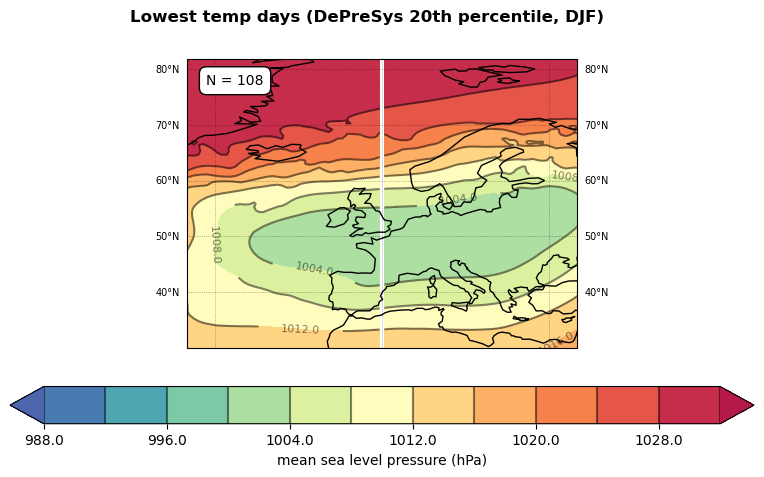

In [25]:
# plot the composite
plot_dps_composite(
    df=dps_df_subset_lowest_temp_20th,
    title="Lowest temp days (DePreSys 20th percentile, DJF)",
    lead="time_worst_tas_lead",
    anoms=False,
    composite=True,
    months=[12, 1, 2],
    climatology_years=[1990, 2020],
)

In [23]:
# data_wind_1th = dps_df["data_wind"].quantile(0.01)

# # subset the df to the 1th percentile of wind
# dps_df_subset_lowest_wind_1th = dps_df[dps_df["data_wind"] <= data_wind_1th]

In [24]:
# # calculate the 20th centile for data wind
# dps_data_wind_20th = dps_df["data_wind"].quantile(0.2)

# # subset the df to the 20th percentile of wind
# dps_df_subset_lowest_wind_20th = dps_df[dps_df["data_wind"] <= dps_data_wind_20th]

In [25]:
# # print the rows where dps_df_subset_lowest_wind_20th has effective dec year 2004
# dps_df_subset_lowest_wind_20th[dps_df_subset_lowest_wind_20th["effective_dec_year"] == 2004]

In [26]:
# # remove row at index 446 as a bodge fix
# dps_df_subset_lowest_wind_20th = dps_df_subset_lowest_wind_20th.drop(446)

In [27]:
# # test the function
# plot_dps_composite(
#     df=dps_df_subset_lowest_wind_20th,
#     title="Lowest wind days (DePreSys 20th percentile, DJF)",
#     lead="time_worst_wind_lead",
#     anoms=False,
#     composite=True,
#     months=[12, 1, 2],
#     climatology_years=[1990, 2020],
# )

Some part of DePreSys processing doesn't appear to be working correctly. To check whether the method we are applying is valid, let's now check the Canari composites to see whether they look more realistic.

In [28]:
# Set up the path to the canari data
canari_path = "/home/users/benhutch/unseen_multi_year/dfs/Canari_worst_djf_wind_temp_days_DJF_1960-2013.csv"

# Load the data
canari_df = pd.read_csv(canari_path)

In [29]:
canari_df.head()

,effective_dec_year,member,time_worst_wind,time_worst_tas,data_wind,data_tas_worst_wind,data_tas,data_wind_worst_tas,data_tas_dt,data_tas_worst_wind_dt
0,1960,1,1961-01-30,1960-12-21,1.892235,2.861436,-1.445395,2.481561,2.242008,6.548839
1,1960,2,1961-02-19,1961-02-02,2.027462,6.023582,-3.529893,3.503737,0.157511,9.710985
2,1960,3,1960-12-03,1961-01-13,2.880504,-1.685843,-6.243748,5.547405,-2.556345,2.001560
3,1960,4,1960-12-29,1961-01-23,1.600568,-1.297926,-5.877452,2.892183,-2.190049,2.389477
4,1960,5,1960-12-26,1961-01-03,2.514957,2.212363,-4.750289,4.193209,-1.062886,5.899766


In [30]:
# # subset the cube to the 1th percentile of wind
canari_lowest_wind_1th = canari_df["data_wind"].quantile(0.01)

# # subset the df to the 1th percentile of wind
canari_df_subset_lowest_wind_1th = canari_df[canari_df["data_wind"] <= canari_lowest_wind_1th]

In [31]:
canari_df_subset_lowest_wind_1th.head()

,effective_dec_year,member,time_worst_wind,time_worst_tas,data_wind,data_tas_worst_wind,data_tas,data_wind_worst_tas,data_tas_dt,data_tas_worst_wind_dt
258,1966,19,1966-12-11,1966-12-29,1.553527,1.892333,-10.344365,1.971412,-6.835544,5.401154
323,1968,4,1969-01-12,1969-02-08,1.458429,1.120310,-2.952701,2.837334,0.496593,4.569604
324,1968,5,1968-12-05,1968-12-13,1.523202,-4.031633,-6.634977,3.219194,-3.185684,-0.582339
492,1972,13,1972-12-20,1973-02-17,1.544104,1.161670,-1.223123,4.799125,2.107116,4.491909
615,1975,16,1976-02-05,1975-12-02,1.507712,0.352577,-3.687092,2.213034,-0.446144,3.593525


In [32]:
# set up the 0.1th percentile for wind
canari_lowest_wind_0_1th = canari_df["data_wind"].quantile(0.001)

# subset the df to the 0.1th percentile of wind
canari_df_subset_lowest_wind_0_1th = canari_df[canari_df["data_wind"] <= canari_lowest_wind_0_1th]

In [33]:
canari_df_subset_lowest_wind_0_1th.head()

,effective_dec_year,member,time_worst_wind,time_worst_tas,data_wind,data_tas_worst_wind,data_tas,data_wind_worst_tas,data_tas_dt,data_tas_worst_wind_dt
323,1968,4,1969-01-12,1969-02-08,1.458429,1.120310,-2.952701,2.837334,0.496593,4.569604
1575,1999,16,2000-02-16,1999-12-29,1.462746,0.911395,-5.842302,2.628233,-3.315683,3.438015
1770,2004,11,2005-01-26,2005-02-04,1.423732,1.481174,-2.032958,4.720606,0.344843,3.858975


In [34]:
# %%time

# # test the function
# plot_canari_composite(
#     df=canari_df_subset_lowest_wind_0_1th,
#     title="Lowest wind days (CANARI 0.1th percentile, DJF)",
#     time="time_worst_wind",
#     anoms=False,
#     composite=False,
#     months=[12, 1, 2],
#     climatology_years=[1990, 2020],
# )

Look into plotting the percentiles of temperature against wind speed.

Like in Thornton et al. (2017).

In [35]:
full_obs_df.head()

,effective_dec_year,time_worst_wind,time_worst_tas,data_wind,data_tas_worst_wind,data_tas,data_wind_worst_tas,data_tas_dt,data_tas_worst_wind_dt,time_worst_wind_date,time_worst_tas_date
0,1960,17,41,2.068829,5.572500,-0.392873,3.525066,2.653499,8.618872,1960-12-18,1961-01-11
1,1961,107,121,2.006371,0.440456,-3.468196,3.471272,-0.463371,3.445281,1961-12-18,1962-01-01
2,1962,263,222,1.865907,-2.900903,-6.757083,2.923640,-3.793806,0.062374,1963-02-22,1963-01-12
3,1963,278,289,2.263446,1.783876,-2.562683,3.577491,0.359046,4.705605,1963-12-09,1963-12-20
4,1964,425,388,2.394781,-0.870013,-3.339781,4.008221,-0.459599,2.010169,1965-02-03,1964-12-28


In [36]:
# set up the percentile thresholds
percentiles = np.arange(1, 101, 1)

# set up a new dataframe for the observations
obs_df_percentiles = pd.DataFrame()

# loop over the percentiles
for percentile in percentiles:
    # extract the percentile
    data_wind_percentile = full_obs_df["data_wind"].quantile(percentile / 100)
    data_tas_percentile = full_obs_df["data_tas_dt"].quantile(percentile / 100)

    # subset the df to the percentile
    obs_df_subset_percentile_wind = full_obs_df[full_obs_df["data_wind"] <= data_wind_percentile]
    obs_df_subset_percentile_temp = full_obs_df[full_obs_df["data_tas_dt"] <= data_tas_percentile]

    # Set up a new dataframe
    df_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold_data_wind": [data_wind_percentile],
            "threshold_data_tas_dt": [data_tas_percentile],
            "n_days_wind": [len(obs_df_subset_percentile_wind)],
            "n_days_tas_dt": [len(obs_df_subset_percentile_temp)],
            "mean_tas_dt_worst_wind": [obs_df_subset_percentile_wind["data_tas_worst_wind_dt"].mean()],
            "mean_wind_worst_tas_dt": [obs_df_subset_percentile_temp["data_wind_worst_tas"].mean()],
        }
    )

    # concat this to the percentiles dataframe
    obs_df_percentiles = pd.concat([obs_df_percentiles, df_this])

In [37]:
dps_df.head()

,effective_dec_year,member,time_worst_wind,time_worst_tas,data_wind,data_tas_worst_wind,data_tas,data_wind_worst_tas,data_tas_dt,data_tas_worst_wind_dt,time_worst_wind_lead,time_worst_tas_lead
0,1960,1,12,62,2.049034,6.542990,-0.088807,3.649304,2.129563,8.761359,43,93
1,1960,2,116,119,1.820041,0.951182,-0.894575,3.437141,1.323794,3.169551,57,60
2,1960,3,258,233,1.823847,3.572365,0.071863,3.006122,2.290232,5.790735,109,84
3,1960,4,282,354,2.067820,4.440562,0.448920,4.191934,2.667290,6.658931,43,115
4,1960,5,427,384,2.283272,3.310963,-0.451000,3.762156,1.767369,5.529332,98,55


In [38]:
# Do the same for the DePreSys data
dps_df_percentiles = pd.DataFrame()

# loop over the percentiles
for percentile in percentiles:
    # extract the percentile
    data_wind_percentile = dps_df["data_wind"].quantile(percentile / 100)
    data_tas_percentile = dps_df["data_tas_dt"].quantile(percentile / 100)

    # subset the df to the percentile
    dps_df_subset_percentile_wind = dps_df[dps_df["data_wind"] <= data_wind_percentile]
    dps_df_subset_percentile_temp = dps_df[dps_df["data_tas_dt"] <= data_tas_percentile]

    # Set up a new dataframe
    df_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold_data_wind": [data_wind_percentile],
            "threshold_data_tas_dt": [data_tas_percentile],
            "n_days_wind": [len(dps_df_subset_percentile_wind)],
            "n_days_tas_dt": [len(dps_df_subset_percentile_temp)],
            "mean_tas_dt_worst_wind": [dps_df_subset_percentile_wind["data_tas_worst_wind_dt"].mean()],
            "mean_wind_worst_tas": [dps_df_subset_percentile_temp["data_wind_worst_tas"].mean()],
        }
    )

    # concat this to the percentiles dataframe
    dps_df_percentiles = pd.concat([dps_df_percentiles, df_this])

In [39]:
canari_df.head()

,effective_dec_year,member,time_worst_wind,time_worst_tas,data_wind,data_tas_worst_wind,data_tas,data_wind_worst_tas,data_tas_dt,data_tas_worst_wind_dt
0,1960,1,1961-01-30,1960-12-21,1.892235,2.861436,-1.445395,2.481561,2.242008,6.548839
1,1960,2,1961-02-19,1961-02-02,2.027462,6.023582,-3.529893,3.503737,0.157511,9.710985
2,1960,3,1960-12-03,1961-01-13,2.880504,-1.685843,-6.243748,5.547405,-2.556345,2.001560
3,1960,4,1960-12-29,1961-01-23,1.600568,-1.297926,-5.877452,2.892183,-2.190049,2.389477
4,1960,5,1960-12-26,1961-01-03,2.514957,2.212363,-4.750289,4.193209,-1.062886,5.899766


In [40]:
# same for the canari data
canari_df_percentiles = pd.DataFrame()

# loop over the percentiles
for percentile in percentiles:
    # extract the percentile
    data_wind_percentile = canari_df["data_wind"].quantile(percentile / 100)
    data_tas_percentile = canari_df["data_tas_dt"].quantile(percentile / 100)

    # subset the df to the percentile
    canari_df_subset_percentile_wind = canari_df[canari_df["data_wind"] <= data_wind_percentile]
    canari_df_subset_percentile_temp = canari_df[canari_df["data_tas_dt"] <= data_tas_percentile]

    # Set up a new dataframe
    df_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold_data_wind": [data_wind_percentile],
            "threshold_data_tas_dt": [data_tas_percentile],
            "n_days_wind": [len(canari_df_subset_percentile_wind)],
            "n_days_tas_dt": [len(canari_df_subset_percentile_temp)],
            "mean_tas_dt_worst_wind": [canari_df_subset_percentile_wind["data_tas_worst_wind_dt"].mean()],
            "mean_wind_worst_tas": [canari_df_subset_percentile_temp["data_wind_worst_tas"].mean()],
        }
    )

    # concat this to the percentiles dataframe
    canari_df_percentiles = pd.concat([canari_df_percentiles, df_this])

In [41]:
obs_df_percentiles.columns

Index(['percentile', 'threshold_data_wind', 'threshold_data_tas_dt',
       'n_days_wind', 'n_days_tas_dt', 'mean_tas_dt_worst_wind',
       'mean_wind_worst_tas_dt'],
      dtype='object')

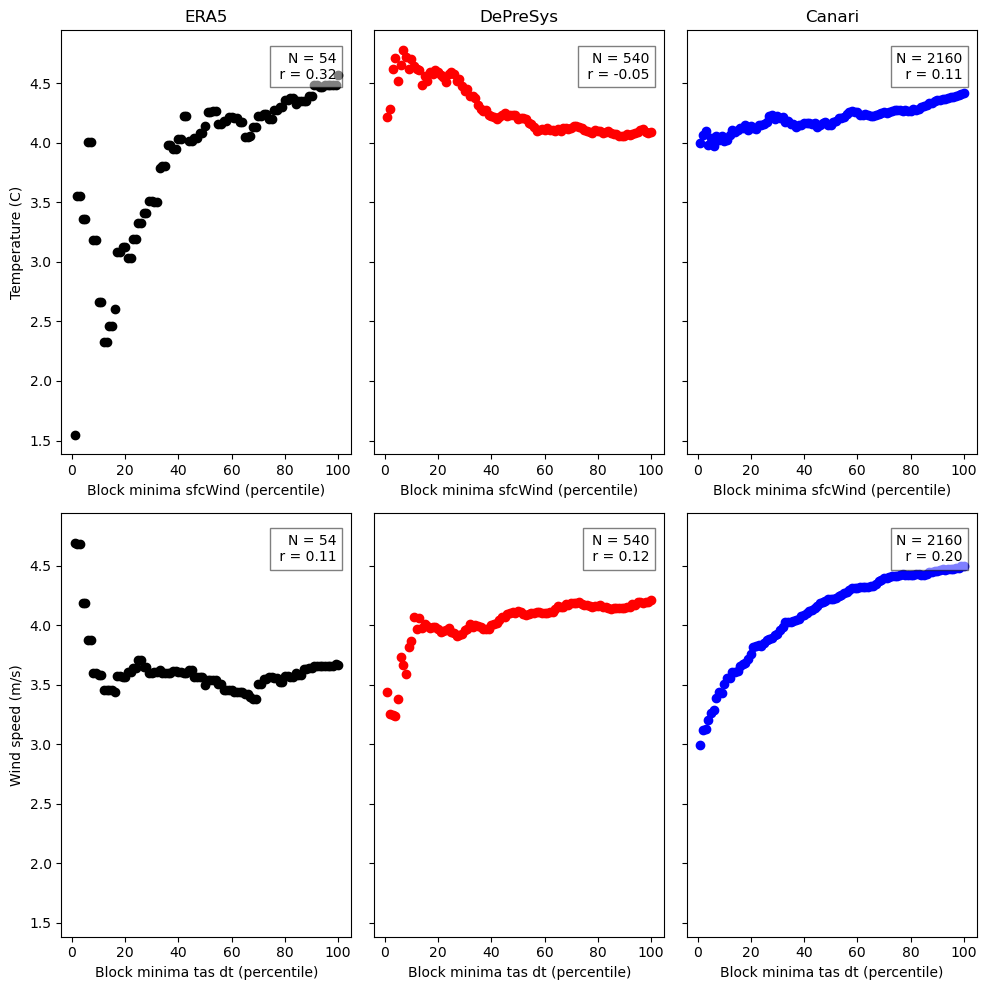

In [42]:
from scipy.stats import pearsonr

# Set up two subplots
# one row, two columns
fig, axs = plt.subplots(2, 3, figsize=(10, 10), sharey=True)

# Plot a scatter of the worst wind days
# with the tas values on these worst wind days
axs[0, 0].scatter(
    obs_df_percentiles["percentile"],
    obs_df_percentiles["mean_tas_dt_worst_wind"],
    color="black",
    label="ERA5 DJF block minima",
)

# calculate the correlation between full_obs_df["data_wind"] and full_obs_df["data_tas_dt"]
corr_obs_worst_wind_tas_dt, _ = pearsonr(full_obs_df["data_wind"], full_obs_df["data_tas_worst_wind_dt"])

# Set up the xlable
axs[0, 0].set_xlabel("Block minima sfcWind (percentile)")

# Set up the ylabel
axs[0, 0].set_ylabel("Temperature (C)")

# Set up the title
axs[0, 0].set_title("ERA5")

# # mark the max value of wind speed with a solid green vertical line
# axs[0].axvline(df_obs_worst_djf_days["data_wind"].max(), color="green", linestyle="-", label="ERA5 max")

# # mark the max value of temperature with a solid red horizontal line
# axs[0].axhline(df_obs_worst_djf_days["data_tas_dt"].max(), color="red", linestyle="-", label="ERA5 max")

# Plot a scatter
# of the worst temperature days
# with the wind values on these worst temperature days
axs[1, 0].scatter(
    obs_df_percentiles["percentile"],
    obs_df_percentiles["mean_wind_worst_tas_dt"],
    color="black",
    label="ERA5 DJF block minima",
)

# calculate the correlation between full_obs_df["data_tas_dt"] and full_obs_df["data_wind_worst_tas"]
corr_obs_worst_tas_dt_wind, _ = pearsonr(full_obs_df["data_tas_dt"], full_obs_df["data_wind_worst_tas"])

# Set up the xlable
axs[1, 0].set_xlabel("Block minima tas dt (percentile)")

# # Set up the xlable
# axs[1, 1].set_xlabel("Percentile of block minima Temperature (detrended)")

# set up the ylabel
axs[1, 0].set_ylabel("Wind speed (m/s)")

# # Set up the title
# axs[1, 0].set_title("ERA5")

# # set up a dashed blue line at 0
# axs[1, 0].axhline(0, color="blue", linestyle="--")

# # Calculate the 0th and 50th percentiles for wind speed
# wind_0th_percentile = df_obs_worst_djf_days["data_wind"].quantile(0.00)
# wind_50th_percentile = df_obs_worst_djf_days["data_wind"].quantile(0.50)

# # Calculate the 0th and 50th percentiles for temperature
# temp_0th_percentile = df_obs_worst_djf_days["data_tas_dt"].quantile(0.00)
# temp_50th_percentile = df_obs_worst_djf_days["data_tas_dt"].quantile(0.50)

# # Mark the 0th and 50th percentiles of wind speed with solid green vertical lines
# axs[1, 0].axvline(wind_0th_percentile, color="green", linestyle="-", label="ERA5 0th percentile")
# axs[1, 0].axvline(wind_50th_percentile, color="green", linestyle="-", label="ERA5 50th percentile")

# # Mark the 0th and 50th percentiles of temperature with solid red horizontal lines
# axs[1, 0].axhline(temp_0th_percentile, color="red", linestyle="-", label="ERA5 0th percentile")
# axs[1, 0].axhline(temp_50th_percentile, color="red", linestyle="-", label="ERA5 50th percentile")

# axs[0, 0].axvline(wind_0th_percentile, color="green", linestyle="-", label="ERA5 0th percentile")
# axs[0, 0].axvline(wind_50th_percentile, color="green", linestyle="-", label="ERA5 50th percentile")

# axs[0, 0].axhline(temp_0th_percentile, color="red", linestyle="-", label="ERA5 0th percentile")
# axs[0, 0].axhline(temp_50th_percentile, color="red", linestyle="-", label="ERA5 50th percentile")

# quantify the n points in the low wind, cold temp regions
#i.e. within both the 0th and 50th percentiles of wind speed and temperature
# n_points_worst_wind_cold_temp_obs = df_obs_worst_djf_days[
#     (df_obs_worst_djf_days["data_wind"] <= wind_50th_percentile)
#     & (df_obs_worst_djf_days["data_wind"] >= wind_0th_percentile)
#     & (df_obs_worst_djf_days["data_tas_worst_wind_dt"] <= temp_50th_percentile)
#     & (df_obs_worst_djf_days["data_tas_worst_wind_dt"] >= temp_0th_percentile)
# ].shape[0]

# n_points_worst_temp_low_wind_obs = df_obs_worst_djf_days[
#     (df_obs_worst_djf_days["data_wind_worst_tas"] <= wind_50th_percentile)
#     & (df_obs_worst_djf_days["data_wind_worst_tas"] >= wind_0th_percentile)
#     & (df_obs_worst_djf_days["data_tas_dt"] <= temp_50th_percentile)
#     & (df_obs_worst_djf_days["data_tas_dt"] >= temp_0th_percentile)
# ].shape[0]

# cinlude the total N points
axs[0, 0].text(
    0.95,
    0.95,
    f"N = {len(full_obs_df)}\n r = {corr_obs_worst_wind_tas_dt:.2f}",
    transform=axs[0, 0].transAxes,
    bbox=dict(facecolor="white", alpha=0.5),
    horizontalalignment="right",
    verticalalignment="top",
)

# include the total N points
axs[1, 0].text(
    0.95,
    0.95,
    f"N = {len(full_obs_df)}\n r = {corr_obs_worst_tas_dt_wind:.2f}",
    transform=axs[1, 0].transAxes,
    bbox=dict(facecolor="white", alpha=0.5),
    horizontalalignment="right",
    verticalalignment="top",
)

# # Shade the region where the 0th to 50th percentiles of wind speed and temperature intersect
# axs[0, 0].fill_betweenx(
#     [temp_0th_percentile, temp_50th_percentile],
#     wind_0th_percentile,
#     wind_50th_percentile,
#     color="gray",
#     alpha=0.3,
#     label="0th-50th percentile region"
# )

# # Shade the region where the 0th to 50th percentiles of wind speed and temperature intersect
# axs[1, 0].fill_betweenx(
#     [temp_0th_percentile, temp_50th_percentile],
#     wind_0th_percentile,
#     wind_50th_percentile,
#     color="gray",
#     alpha=0.3,
#     label="0th-50th percentile region"
# )

# # Add legend
# axs[0].legend()
# axs[1].legend()

# # include text on the lower red line in red, saying "cold temps"
# axs[1, 0].text(
#     8,
#     -4.8,
#     "cold temps",
#     color="red",
#     horizontalalignment="right",
# )

# # include vertical text on the left most green in green, saying "low wind"
# axs[1, 0].text(
#     1.8,
#     6,
#     "low wind",
#     color="green",
#     verticalalignment="top",
#     horizontalalignment="right",
#     rotation=270,
# )

# # set the xlims (1 -10)
# axs[1, 0].set_xlim(1, 9)

# # set the xlabel
# axs[1, 0].set_xlabel("Wind speed (m/s)")

# # set the ylabel
# axs[1, 0].set_ylabel("Temperature (C)")

# set up the third subplot
# Plot a scatter of the worst wind days
# for the model data
axs[0, 1].scatter(
    dps_df_percentiles["percentile"],
    dps_df_percentiles["mean_tas_dt_worst_wind"],
    color="red",
    label="DePreSys DJF block minima",
)

# calculate teh correlation
corr_dps_worst_wind_tas_dt, _ = pearsonr(dps_df["data_wind"], dps_df["data_tas_worst_wind_dt"])

# Set up the xlable
# axs[1, 0].set_xlabel("Wind speed (m/s)")
axs[0, 1].set_xlabel("Block minima sfcWind (percentile)")

# # set up the ylabel
# axs[0, 1].set_ylabel("Temperature (C)")

# set up the title
axs[0, 1].set_title("DePreSys")

# set up a dashed blue line at 0
# axs[1, 0].axhline(0, color="blue", linestyle="--")

# # set the xlims (1 -10)
# axs[0, 1].set_xlim(1, 9)

# Plot a scatter
# of the worst temperature days
# for the model data
axs[1, 1].scatter(
    dps_df_percentiles["percentile"],
    dps_df_percentiles["mean_wind_worst_tas"],
    color="red",
    label="DePreSys DJF block minima",
)

# Calculate the correlation
corr_dps_worst_tas_dt_wind, _ = pearsonr(dps_df["data_tas_dt"], dps_df["data_wind_worst_tas"])

# Set up the xlable
axs[1, 1].set_xlabel("Block minima tas dt (percentile)")

# Set up the title
# axs[1, 1].set_title("DePreSys")

# set up a dashed blue line at 0
# axs[1, 1].axhline(0, color="blue", linestyle="--")

# Calculate the 0th and 50th percentiles for wind speed
# wind_0th_percentile = df_model_worst_djf_days["data_wind"].quantile(0.00)
# wind_50th_percentile = df_model_worst_djf_days["data_wind"].quantile(0.50)

# # Calculate the 0th and 50th percentiles for temperature
# temp_0th_percentile = df_model_worst_djf_days["data_tas_dt"].quantile(0.00)
# temp_50th_percentile = df_model_worst_djf_days["data_tas_dt"].quantile(0.50)

# # Mark the 0th and 50th percentiles of wind speed with solid green vertical lines
# axs[1, 1].axvline(wind_0th_percentile, color="green", linestyle="-", label="DePreSys 0th percentile")
# axs[1, 1].axvline(wind_50th_percentile, color="green", linestyle="-", label="DePreSys 50th percentile")

# # Mark the 0th and 50th percentiles of temperature with solid red horizontal lines
# axs[1, 1].axhline(temp_0th_percentile, color="red", linestyle="-", label="DePreSys 0th percentile")
# axs[1, 1].axhline(temp_50th_percentile, color="red", linestyle="-", label="DePreSys 50th percentile")

# axs[0, 1].axvline(wind_0th_percentile, color="green", linestyle="-", label="DePreSys 0th percentile")
# axs[0, 1].axvline(wind_50th_percentile, color="green", linestyle="-", label="DePreSys 50th percentile")

# axs[0, 1].axhline(temp_0th_percentile, color="red", linestyle="-", label="DePreSys 0th percentile")
# axs[0, 1].axhline(temp_50th_percentile, color="red", linestyle="-", label="DePreSys 50th percentile")

# # include the total N points
# n_points_worst_wind_cold_temp_dps = df_model_worst_djf_days[
#     (df_model_worst_djf_days["data_wind"] <= wind_50th_percentile)
#     & (df_model_worst_djf_days["data_wind"] >= wind_0th_percentile)
#     & (df_model_worst_djf_days["data_tas_worst_wind_dt"] <= temp_50th_percentile)
#     & (df_model_worst_djf_days["data_tas_worst_wind_dt"] >= temp_0th_percentile)
# ].shape[0]

# n_points_worst_temp_low_wind_dps = df_model_worst_djf_days[
#     (df_model_worst_djf_days["data_wind_worst_tas"] <= wind_50th_percentile)
#     & (df_model_worst_djf_days["data_wind_worst_tas"] >= wind_0th_percentile)
#     & (df_model_worst_djf_days["data_tas_dt"] <= temp_50th_percentile)
#     & (df_model_worst_djf_days["data_tas_dt"] >= temp_0th_percentile)
# ].shape[0]

# cinlude the total N points
axs[0, 1].text(
    0.95,
    0.95,
    f"N = {len(dps_df)}\n r = {corr_dps_worst_wind_tas_dt:.2f}",
    transform=axs[0, 1].transAxes,
    bbox=dict(facecolor="white", alpha=0.5),
    horizontalalignment="right",
    verticalalignment="top",
)

# include the total N points
axs[1, 1].text(
    0.95,
    0.95,
    f"N = {len(dps_df)}\n r = {corr_dps_worst_tas_dt_wind:.2f}",
    transform=axs[1, 1].transAxes,
    bbox=dict(facecolor="white", alpha=0.5),
    horizontalalignment="right",
    verticalalignment="top",
)

# Shade the region where the 0th to 50th percentiles of wind speed and temperature intersect
# axs[0, 1].fill_betweenx(
#     [temp_0th_percentile, temp_50th_percentile],
#     wind_0th_percentile,
#     wind_50th_percentile,
#     color="gray",
#     alpha=0.3,
#     label="0th-50th percentile region"
# )

# # Shade the region where the 0th to 50th percentiles of wind speed and temperature intersect
# axs[1, 1].fill_betweenx(
#     [temp_0th_percentile, temp_50th_percentile],
#     wind_0th_percentile,
#     wind_50th_percentile,
#     color="gray",
#     alpha=0.3,
#     label="0th-50th percentile region"
# )

# in position 0, 2
#plot the canari data
axs[0, 2].scatter(
    canari_df_percentiles["percentile"],
    canari_df_percentiles["mean_tas_dt_worst_wind"],
    color="blue",
    label="Canari DJF block minima",
)

# Calculate the correlations
corr_canari_worst_wind_tas_dt, _ = pearsonr(canari_df["data_wind"], canari_df["data_tas_worst_wind_dt"])

# Set up the title
axs[0, 2].set_title("Canari")

# Set up the xlable
axs[0, 2].set_xlabel("Block minima sfcWind (percentile)")

# # set up the horizontal lines for the 0th and 50th percentiles
# axs[0, 2].axhline(temp_0th_percentile, color="red", linestyle="-", label="Canari 0th percentile")
# axs[0, 2].axhline(temp_50th_percentile, color="red", linestyle="-", label="Canari 50th percentile")

# # set up the vertical lines for the 0th and 50th percentiles
# axs[0, 2].axvline(wind_0th_percentile, color="green", linestyle="-", label="Canari 0th percentile")
# axs[0, 2].axvline(wind_50th_percentile, color="green", linestyle="-", label="Canari 50th percentile")

# # highlight the region where the 0th to 50th percentiles intersect
# axs[0, 2].fill_betweenx(
#     [temp_0th_percentile, temp_50th_percentile],
#     wind_0th_percentile,
#     wind_50th_percentile,
#     color="gray",
#     alpha=0.3,
#     label="0th-50th percentile region"
# )

# # Plot a scatter
# # of the worst temperature days
# # for the model data
axs[1, 2].scatter(
    canari_df_percentiles["percentile"],
    canari_df_percentiles["mean_wind_worst_tas"],
    color="blue",
    label="Canari DJF block minima",
)

# calculate the correlations
corr_canari_worst_tas_dt_wind, _ = pearsonr(canari_df["data_tas_dt"], canari_df["data_wind_worst_tas"])

# Set up the xlable
axs[1, 2].set_xlabel("Block minima tas dt (percentile)")

# Set up the title
# axs[1, 1].set_title("Canari")

# set up a dashed blue line at 0
# axs[1, 1].axhline(0, color="blue", linestyle="--")

# Calculate the 0th and 50th percentiles for wind speed
# wind_0th_percentile = df_canari_worst_djf_days["data_wind"].quantile(0.00)

# highlight the regions
# axs[1, 2].axvline(wind_0th_percentile, color="green", linestyle="-", label="Canari 0th percentile")
# axs[1, 2].axvline(wind_50th_percentile, color="green", linestyle="-", label="Canari 50th percentile")

# # highlight the regions
# axs[1, 2].axhline(temp_0th_percentile, color="red", linestyle="-", label="Canari 0th percentile")
# axs[1, 2].axhline(temp_50th_percentile, color="red", linestyle="-", label="Canari 50th percentile")

# highlight the region
# axs[1, 2].fill_betweenx(
#     [temp_0th_percentile, temp_50th_percentile],
#     wind_0th_percentile,
#     wind_50th_percentile,
#     color="gray",
#     alpha=0.3,
#     label="0th-50th percentile region"
# )

# # include the total N points
# n_points_worst_wind_cold_temp_canari = df_canari_worst_djf_days[
#     (df_canari_worst_djf_days["data_wind"] <= wind_50th_percentile)
#     & (df_canari_worst_djf_days["data_wind"] >= wind_0th_percentile)
#     & (df_canari_worst_djf_days["data_tas_worst_wind_dt"] <= temp_50th_percentile)
#     & (df_canari_worst_djf_days["data_tas_worst_wind_dt"] >= temp_0th_percentile)
# ].shape[0]

# n_points_worst_temp_low_wind_canari = df_canari_worst_djf_days[
#     (df_canari_worst_djf_days["data_wind_worst_tas"] <= wind_50th_percentile)
#     & (df_canari_worst_djf_days["data_wind_worst_tas"] >= wind_0th_percentile)
#     & (df_canari_worst_djf_days["data_tas_dt"] <= temp_50th_percentile)
#     & (df_canari_worst_djf_days["data_tas_dt"] >= temp_0th_percentile)
# ].shape[0]

# cinlude the total N points
axs[0, 2].text(
    0.95,
    0.95,
    f"N = {len(canari_df)}\n r = {corr_canari_worst_wind_tas_dt:.2f}",
    transform=axs[0, 2].transAxes,
    bbox=dict(facecolor="white", alpha=0.5),
    horizontalalignment="right",
    verticalalignment="top",
)

# include the total N points
axs[1, 2].text(
    0.95,
    0.95,
    f"N = {len(canari_df)}\n r = {corr_canari_worst_tas_dt_wind:.2f}",
    transform=axs[1, 2].transAxes,
    bbox=dict(facecolor="white", alpha=0.5),
    horizontalalignment="right",
    verticalalignment="top",
)

# set a tight layout
plt.tight_layout()